In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [91]:
file_path = r"D:\\Users\\shind\\Downloads\\AviationData.csv"
df = pd.read_csv(file_path, encoding='latin1',low_memory=False)

In [92]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [93]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [95]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [96]:
df.shape

(88889, 31)

In [97]:
# Dropping the columns having more missing values
thershold=0.3
missing_counts= df.isna().sum()
total_row= len(df)
drop_col= [i for i in df.columns if missing_counts[i]/total_row > thershold]
df.drop(columns=drop_col,inplace=True)
df.shape

(88889, 22)

In [98]:
df2=df.copy()
df.drop('Publication.Date',axis=1,inplace=True)

In [99]:
d={}
for i in df.columns:
    d[i]=len(df[i].unique())
unique_values= pd.DataFrame(list(d.items()), columns=['Column', 'unique_val'])
unique_values["missing_values"]= df.isna().sum().values
unique_values

,Column,unique_val,missing_values
0,Event.Id,87951,0
1,Investigation.Type,2,0
2,Accident.Number,88863,0
3,Event.Date,14782,0
4,Location,27759,52
5,Country,220,226
6,Injury.Severity,110,1000
7,Aircraft.damage,5,3194
8,Registration.Number,79105,1382
9,Make,8238,63


In [100]:
# dropping rows having more missing values
subset_col=list(unique_values[unique_values['missing_values']>1000]['Column'])
df.dropna(subset=subset_col, inplace=True)
df.shape

(63312, 21)

In [101]:
df.isna().sum()

Event.Id                    0
Investigation.Type          0
Accident.Number             0
Event.Date                  0
Location                   15
Country                   198
Injury.Severity            11
Aircraft.damage             0
Registration.Number         0
Make                        8
Model                      23
Amateur.Built               0
Number.of.Engines           0
Engine.Type                 0
Purpose.of.flight           0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
Report.Status               0
dtype: int64

In [102]:
# Handeling Null values
l2=['Location','Country','Injury.Severity','Model','Make']
for i in l2:
        df[i].fillna(df[i].mode()[0],inplace=True)
df.isna().sum()

D:\Users\shind\AppData\Local\Temp\ipykernel_17980\1373157404.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
dtype: int64

In [103]:
pd.set_option('display.max_columns', None)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Probable Cause
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause


In [104]:
obj_col= df.select_dtypes(include='object').columns
for i in obj_col:
    df[i]= df[i].str.strip()

df[obj_col].head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Engine.Type,Purpose.of.flight,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,Reciprocating,Personal,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,Reciprocating,Personal,UNK,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,Reciprocating,Personal,IMC,Probable Cause
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,180,No,Reciprocating,Personal,IMC,Probable Cause
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,140,No,Reciprocating,Personal,VMC,Probable Cause


In [105]:
# cleaning colmns one by one

df['Make']=df['Make'].str.title()
df['Make'].replace('[!@#$%^&*()_+{}|:"<>,-./?`~=;0123456789]', '', regex=True, inplace=True)    
len(df['Make'].unique())
df['Make']= df['Make'].str.strip()
len(df['Make'].unique())

D:\Users\shind\AppData\Local\Temp\ipykernel_17980\1214300869.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Make'].replace('[!@#$%^&*()_+{}|:"<>,-./?`~=;0123456789]', '', regex=True, inplace=True)


5650

In [106]:
def str_clean(row):
    parts = row.split(" ", 2)
    if len(parts) > 1:
        return parts[0]
    else:
        return row
df['Make']=df["Make"].apply(str_clean)

In [107]:
df['Model'] = df['Model'].apply(lambda x: x.upper())
df['Model'] = df['Model'].str.replace('-', ' ')
df['Model'] = df['Model'].apply(str_clean)
#df['Model'].value_counts().sort_values(ascending=False)

In [108]:
pd.set_option('display.max_columns', None)

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Probable Cause
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause


In [109]:
class AircraftAccidentVisualizer:
    def __init__(self, data):
        self.data = data

    def visualize_top_10_models_by_make(self):
        top_10_makes = self.data['Make'].value_counts().head(10).index

        for make in top_10_makes:
            make_data = self.data[self.data['Make'] == make]
            top_10_models = make_data['Model'].value_counts().head(10)
            top_10_models.plot(kind='bar', title=f'Top 10 Models for {make} Aircraft in Accidents')
            plt.xlabel('Model')
            plt.ylabel('Number of Accidents')
            plt.show()
        
    def visulize_engines(self):
        engine_weather_counts = self.data.groupby(['Engine.Type', 'Weather.Condition']).size().reset_index(name='Count')
        plt.figure(figsize=(20,12))
        sns.barplot(x= 'Engine.Type', y= 'Count',hue='Weather.Condition',data=engine_weather_counts)
        plt.xlabel('Type of Eng.')
        plt.ylabel('Count of Engine')
        plt.title('Count of Engine Types by Weather Condition')
        plt.legend(title='Weather Condition', loc='upper right')

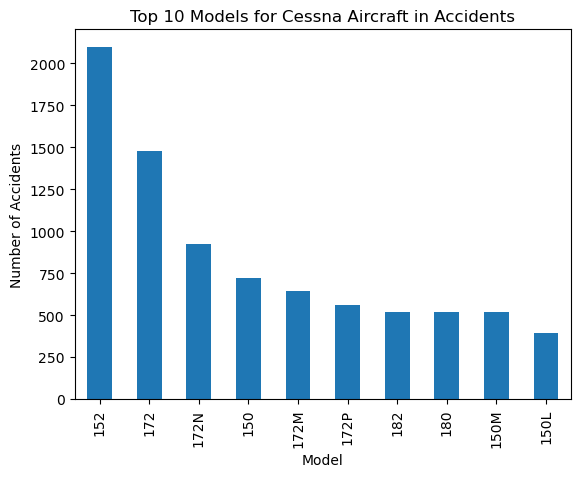

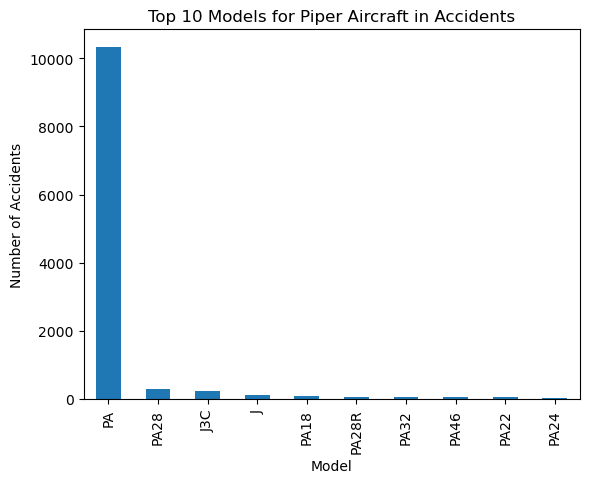

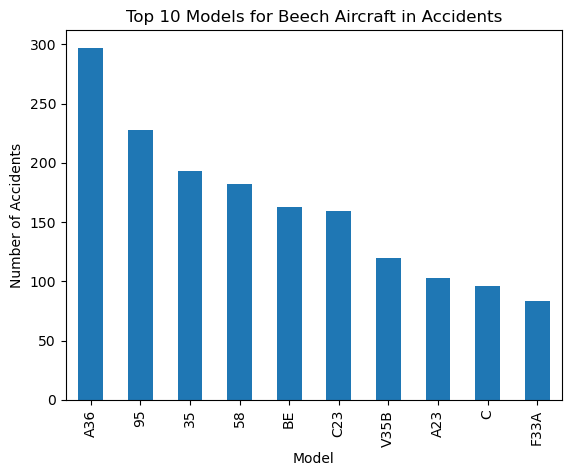

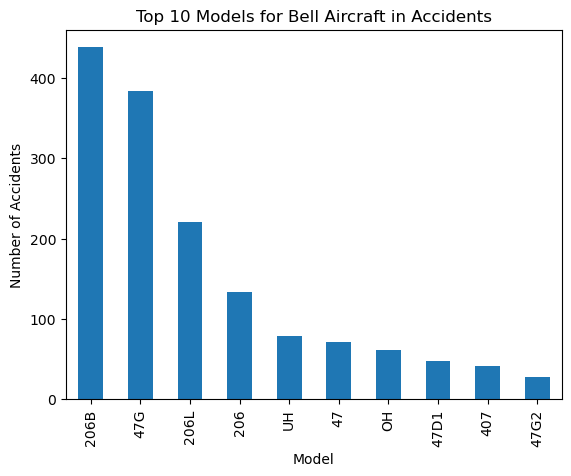

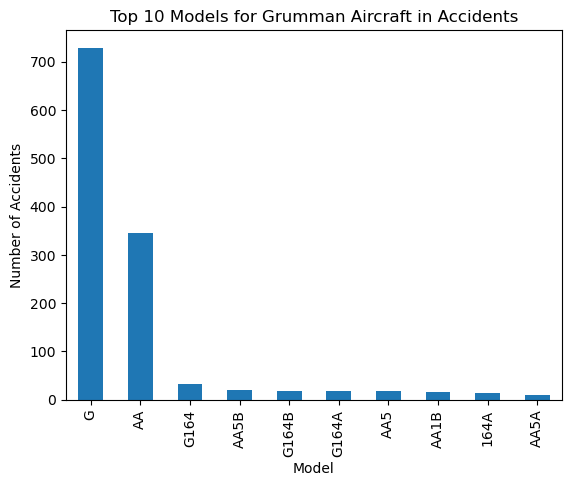

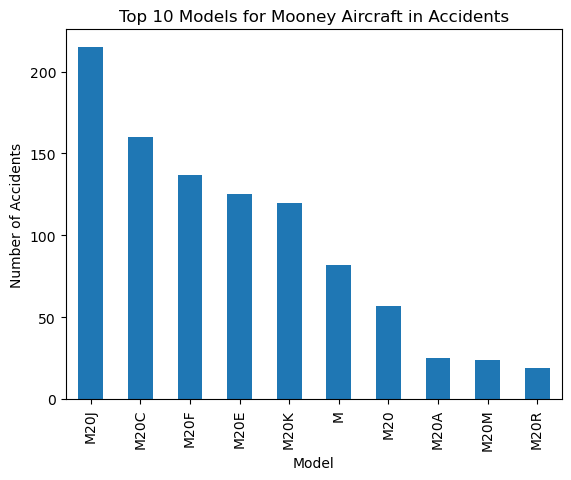

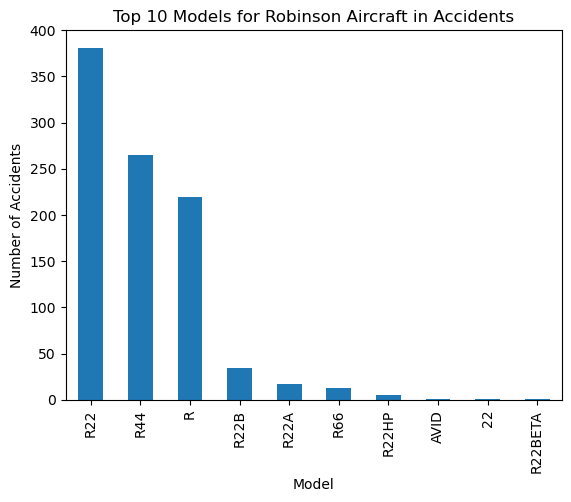

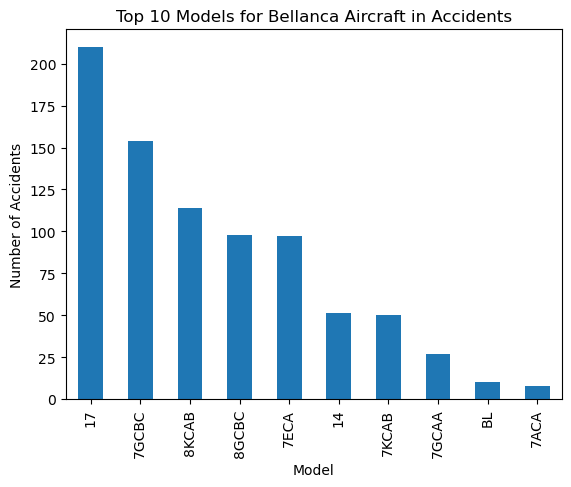

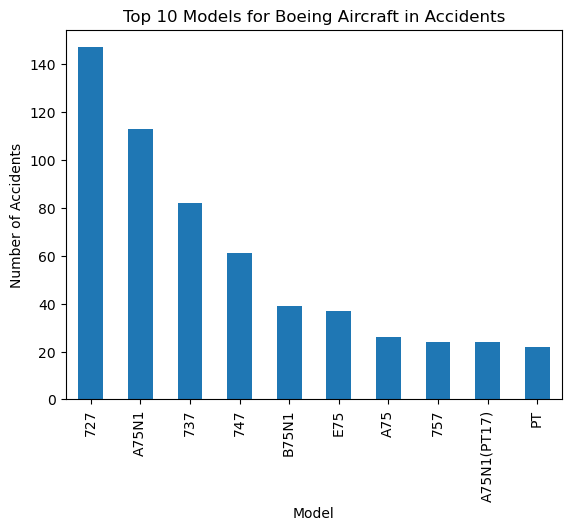

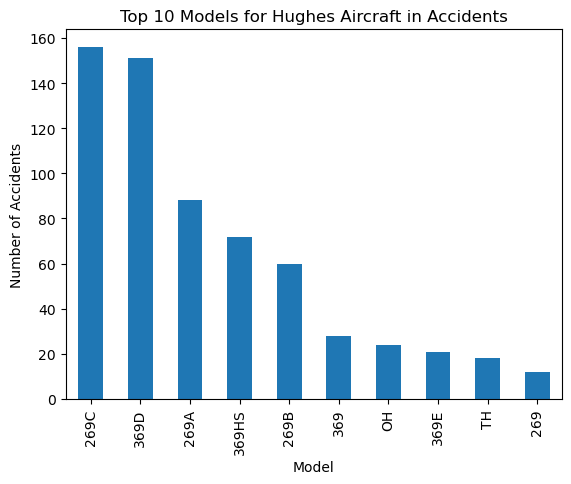

In [110]:
visulizer= AircraftAccidentVisualizer(df)
visulizer.visualize_top_10_models_by_make()

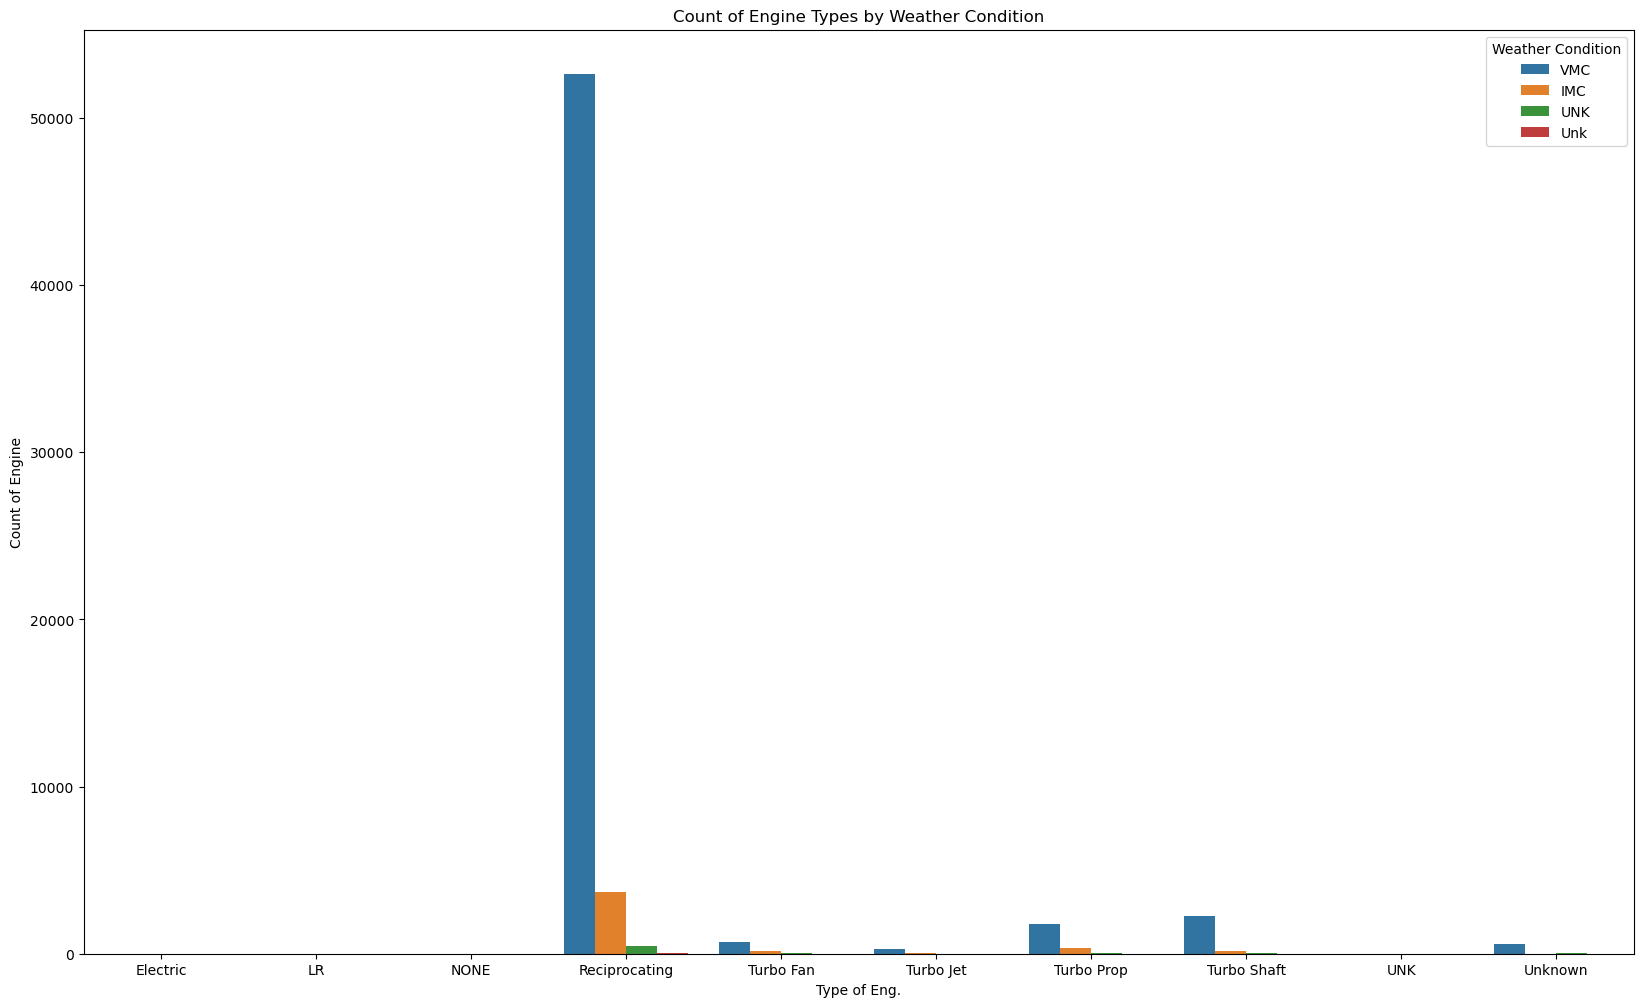

In [111]:
visulizer.visulize_engines()

In [112]:
df["Event.Date"]=pd.to_datetime(df["Event.Date"])
df['year']= df["Event.Date"].dt.year

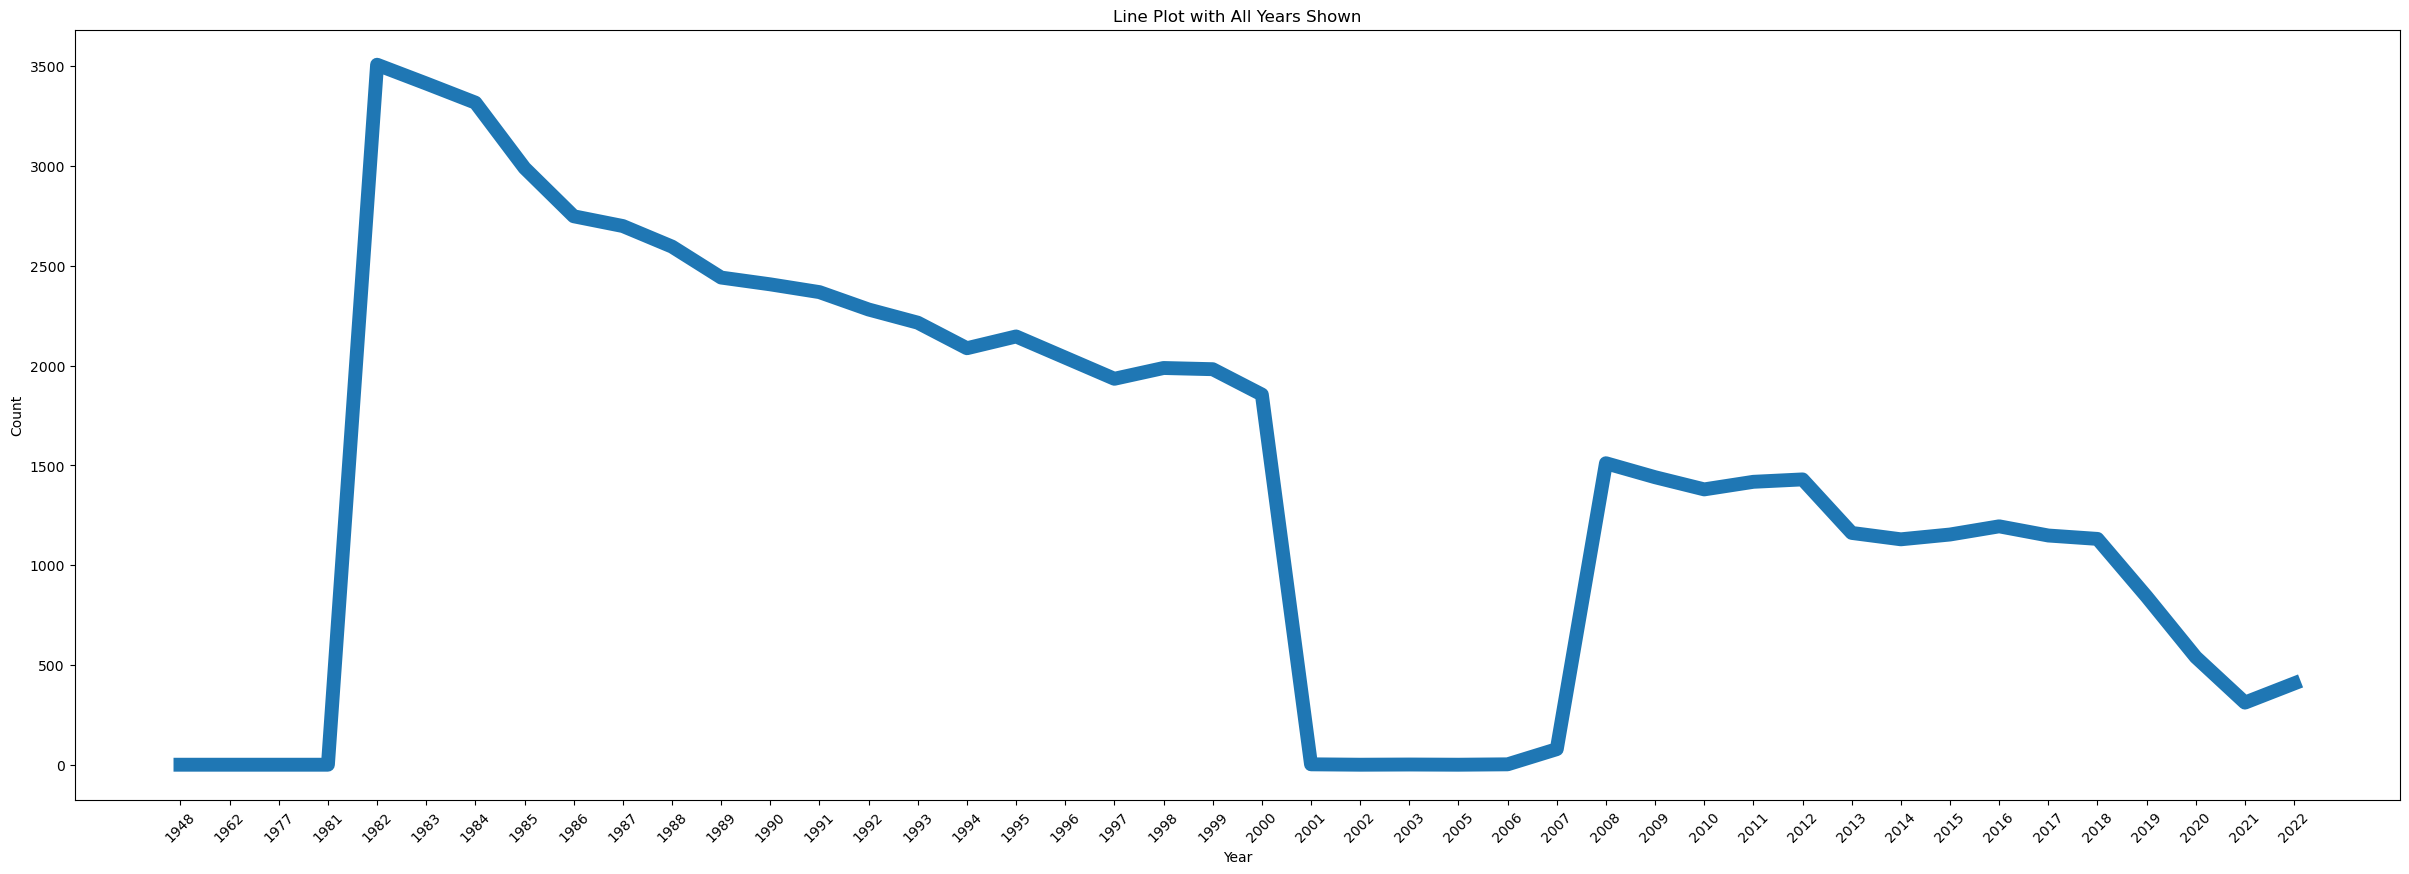

In [113]:
plt.figure(figsize=(30,10))
year_data=df["year"].value_counts().sort_index()
x_= year_data.index.astype(str)
y_ = year_data.values
sns.lineplot(x=x_, y=y_,sort=False,markers=True, linewidth=10)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Line Plot with All Years Shown')
plt.show()

In [114]:
top10_model=df["Make"].value_counts().head(10)
top10_model.index

Index(['Cessna', 'Piper', 'Beech', 'Bell', 'Grumman', 'Mooney', 'Robinson',
       'Bellanca', 'Boeing', 'Hughes'],
      dtype='object', name='Make')

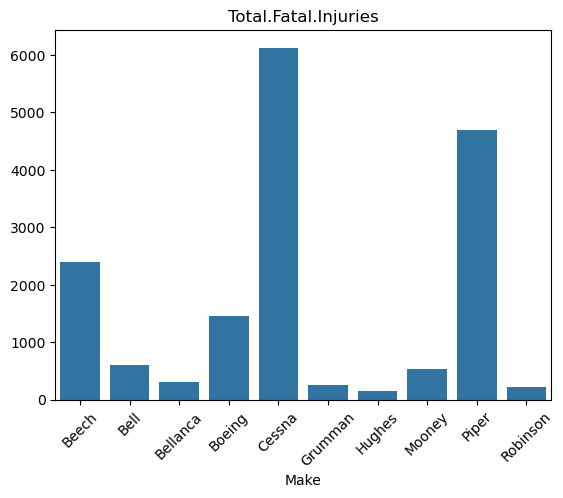

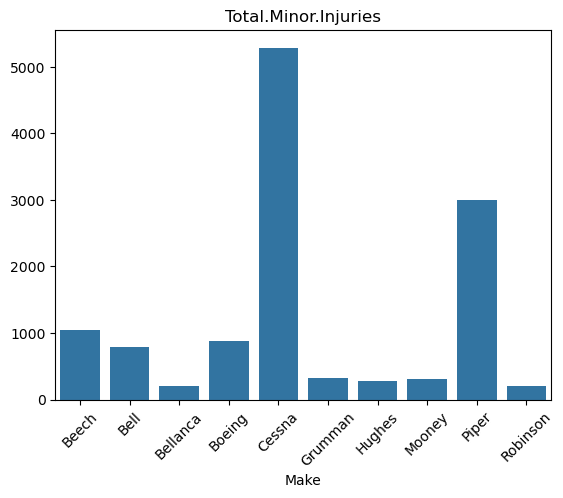

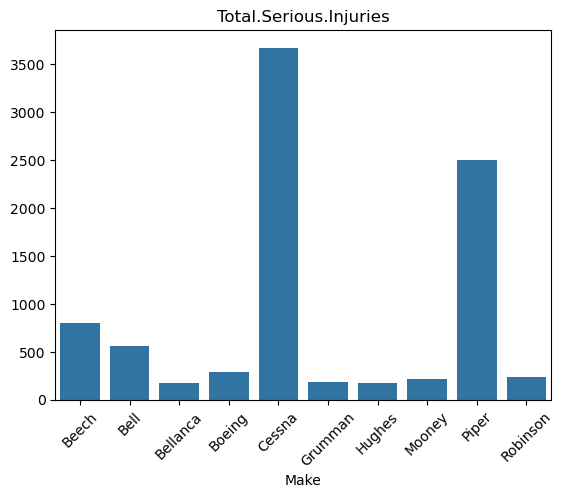

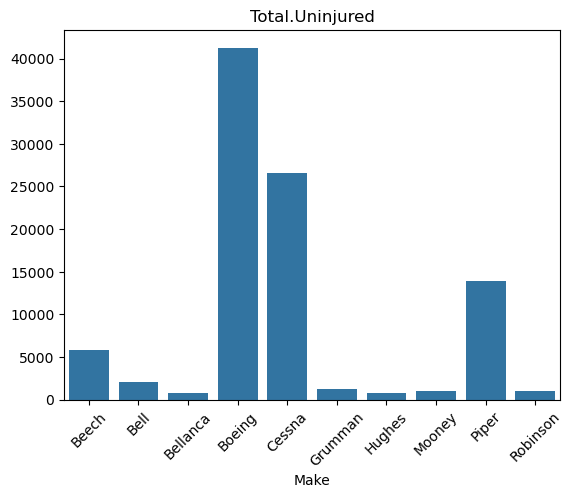

In [115]:
injuries= ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df_selected = df[['Make'] + ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']]
top_10_make_injuries= df_selected[df['Make'].isin(top10_model.index)]
inj_pivot= pd.pivot_table(top_10_make_injuries,values=injuries,columns='Make',aggfunc='sum')
for i in range(0,len(inj_pivot)):
    sns.barplot(x=inj_pivot.iloc[i].index,y=inj_pivot.iloc[i].values)
    plt.title(inj_pivot.index[i])
    plt.xticks(rotation=45)
    plt.show()

In [116]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,1962
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,1977
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Probable Cause,1981
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,1982


In [117]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'year'],
      dtype='object')

In [118]:
cluster_df = df[["Make", "Model", "Weather.Condition", "Amateur.Built", "Engine.Type", "Number.of.Engines","Country"]]

In [119]:
from sklearn.cluster import MiniBatchKMeans

wss = []
for k in range(1, 11):
    kmeans = MiniBatchKMeans(n_clusters=k, n_init=5, random_state=42)
    kmeans.fit(x)
    wss.append(kmeans.inertia_)


In [120]:
wss

[158359.2087938403,
 139169.85698865997,
 133572.29037482076,
 123149.53308672411,
 112856.58614683397,
 111618.22195473275,
 113670.51095566117,
 107019.8509432667,
 102879.11892169315,
 101073.19783783887]

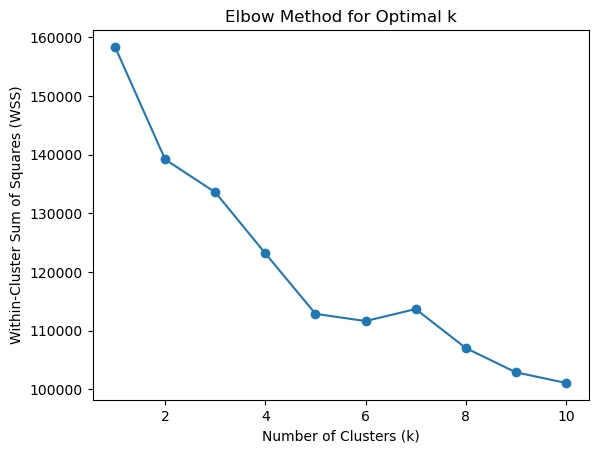

In [121]:
plt.plot(range(1, 11), wss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.show()